## Analiza czynników predysponujących do zapadania na chorobę Parkinsona

> Authors: Maciej Wiatr, Karolina Woźniczak

### Data LICENSE:

Data was downloaded from kaggle: https://www.kaggle.com/datasets/rabieelkharoua/parkinsons-disease-dataset-analysis/data
and is available to us via [Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)


#### Importy

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

#### Odczyt danych

In [22]:
data = pd.read_csv('parkinsons_disease_data.csv')

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


#### Podsumowanie kształtu danych

In [23]:
print('Ilość rekordów: ', len(data))
print('Ilość kolumn: ', len(data.columns))
print('Lista kolumn:', data.columns)


Ilość rekordów:  2105
Ilość kolumn:  35
Lista kolumn: Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')


#### Czyszczenie danych

In [24]:
data = data.drop("DoctorInCharge", axis=1)
data = data.drop("PatientID", axis=1)
data = data.drop("UPDRS", axis=1)

#### Wizualizacja

In [25]:
data_vis = data.copy()
data_vis['Gender'] = data_vis['Gender'].map({0: 'Male', 1: 'Female'})
data_vis['Ethnicity'] = data_vis['Ethnicity'].map({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
data_vis['EducationLevel'] = data_vis['EducationLevel'].map({0: 'None', 1: 'High School', 2: 'Bachelor\'s', 3: 'Higher'})
data_vis['Smoking'] = data_vis['Smoking'].map({0: 'No', 1: 'Yes'})
data_vis['FamilyHistoryParkinsons'] = data_vis['FamilyHistoryParkinsons'].map({0: 'No', 1: 'Yes'})
data_vis['TraumaticBrainInjury'] = data_vis['TraumaticBrainInjury'].map({0: 'No', 1: 'Yes'})
data_vis['Hypertension'] = data_vis['Hypertension'].map({0: 'No', 1: 'Yes'})
data_vis['Diabetes'] = data_vis['Diabetes'].map({0: 'No', 1: 'Yes'})
data_vis['Depression'] = data_vis['Depression'].map({0: 'No', 1: 'Yes'})
data_vis['Stroke'] = data_vis['Stroke'].map({0: 'No', 1: 'Yes'})
data_vis['Tremor'] = data_vis['Tremor'].map({0: 'No', 1: 'Yes'})
data_vis['Rigidity'] = data_vis['Rigidity'].map({0: 'No', 1: 'Yes'})
data_vis['Bradykinesia'] = data_vis['Bradykinesia'].map({0: 'No', 1: 'Yes'})
data_vis['PosturalInstability'] = data_vis['PosturalInstability'].map({0: 'No', 1: 'Yes'})
data_vis['SpeechProblems'] = data_vis['SpeechProblems'].map({0: 'No', 1: 'Yes'})
data_vis['SleepDisorders'] = data_vis['SleepDisorders'].map({0: 'No', 1: 'Yes'})
data_vis['Constipation'] = data_vis['Constipation'].map({0: 'No', 1: 'Yes'})
data_vis['Diagnosis']= data_vis['Diagnosis'].map({0: 'No', 1: 'Yes'})

In [26]:
sns.set(style="whitegrid")

Procent pacjentów z diagnozą: 61.95%


C:\Users\macie\AppData\Local\Temp\ipykernel_11836\2236501616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=data_vis, palette='Set2')


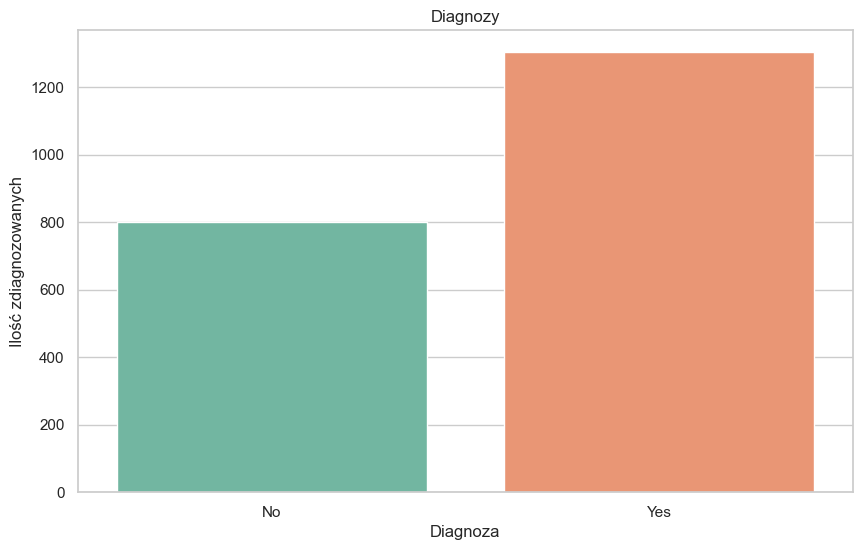

In [27]:
diagnosis_percentage = (data['Diagnosis'] == 1).mean() * 100
print(f"Procent pacjentów z diagnozą: {diagnosis_percentage:.2f}%")

plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=data_vis, palette='Set2')
plt.title('Diagnozy')
plt.xlabel('Diagnoza')
plt.ylabel('Ilość zdiagnozowanych')
plt.show()

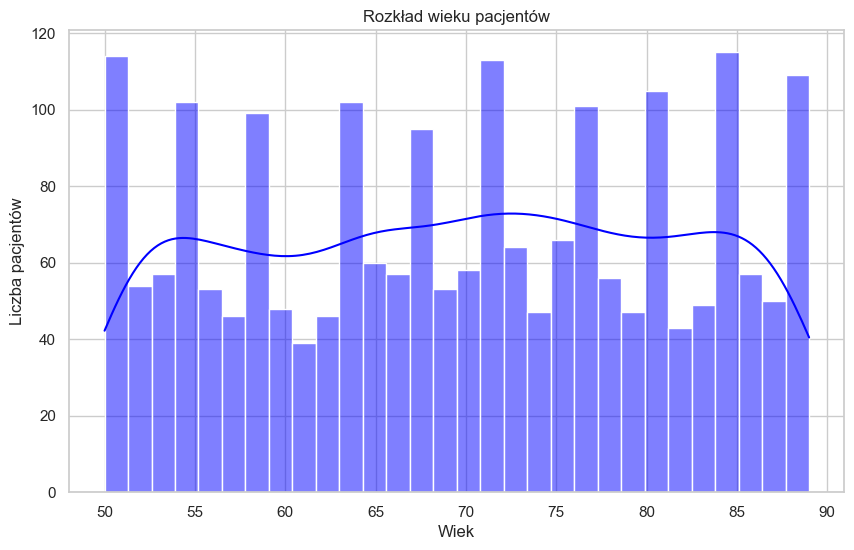

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data_vis['Age'], bins=30, kde=True, color='blue')
plt.title('Rozkład wieku pacjentów')
plt.xlabel('Wiek')
plt.ylabel('Liczba pacjentów')
plt.show()

C:\Users\macie\AppData\Local\Temp\ipykernel_11836\339521556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ethnicity', data=data_vis, palette='Set2')


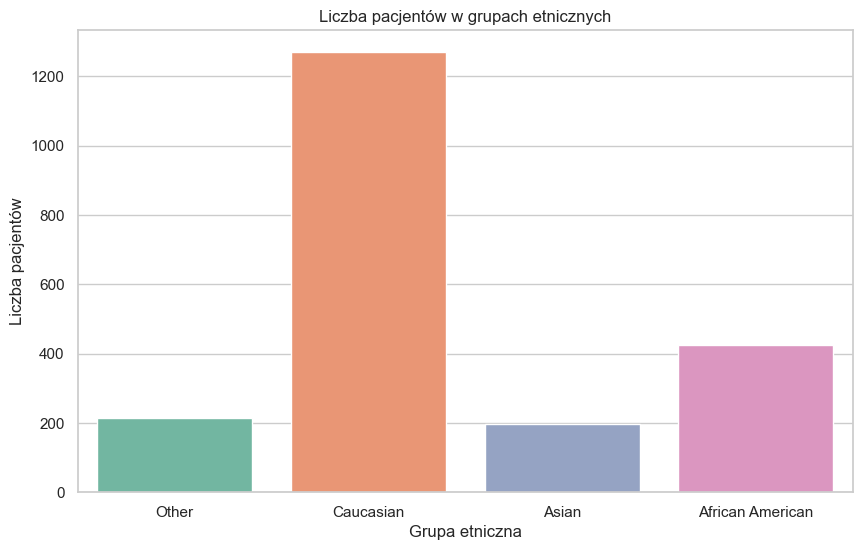

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', data=data_vis, palette='Set2')
plt.title('Liczba pacjentów w grupach etnicznych')
plt.xlabel('Grupa etniczna')
plt.ylabel('Liczba pacjentów')
plt.show()

C:\Users\macie\AppData\Local\Temp\ipykernel_11836\150615385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=data_vis, palette='Set1')


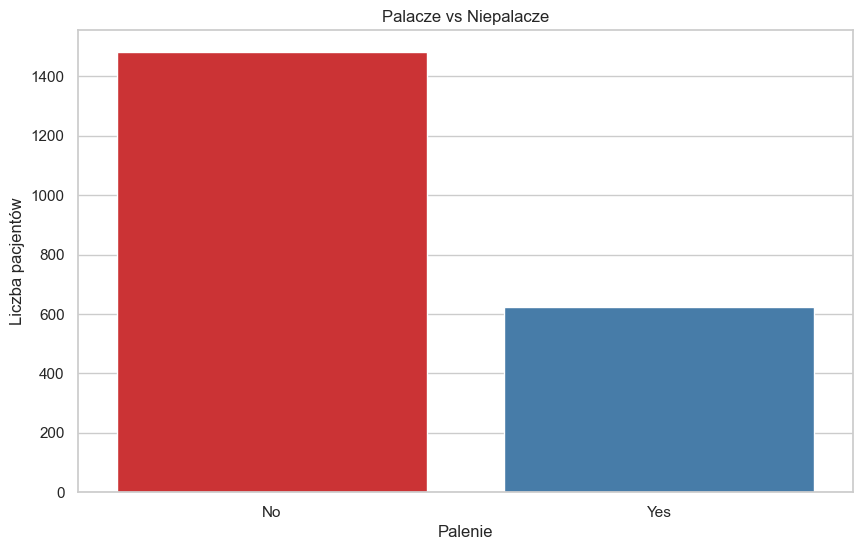

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', data=data_vis, palette='Set1')
plt.title('Palacze vs Niepalacze')
plt.xlabel('Palenie')
plt.ylabel('Liczba pacjentów')
plt.show()

C:\Users\macie\AppData\Local\Temp\ipykernel_11836\2289561665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_vis, palette='Set3')


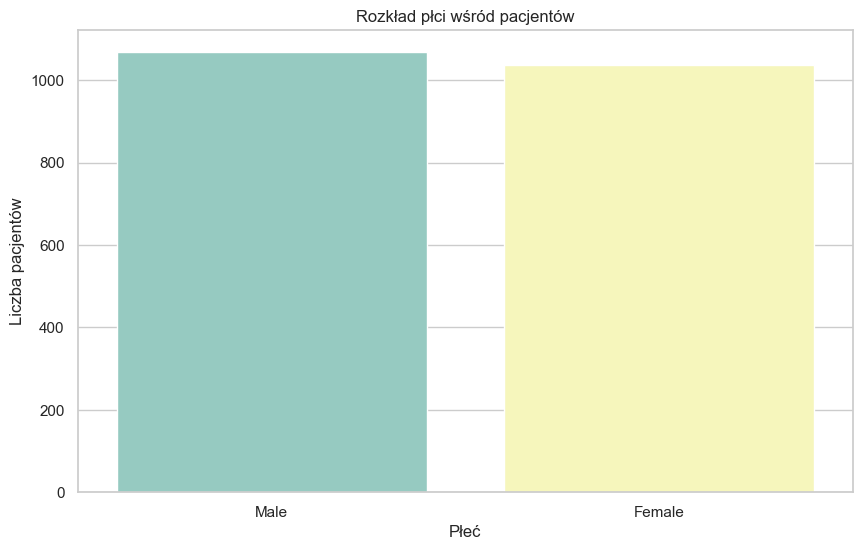

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data_vis, palette='Set3')
plt.title('Rozkład płci wśród pacjentów')
plt.xlabel('Płeć')
plt.ylabel('Liczba pacjentów')
plt.show()

#### Analiza czynników predysponujących do choroby Parkinsona

#### Helper

In [32]:
# Funkcja do obliczania korelacji Craméra dla zmiennych kategorycznych
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return (chi2 / (n * (min(confusion_matrix.shape) - 1))) ** 0.5

#### Płeć

Ilość Mężczyzn:  1068
Ilość Kobiet:  1037
Korelacja między płcią a diagnozą choroby Parkinsona: 0.016835128797290284


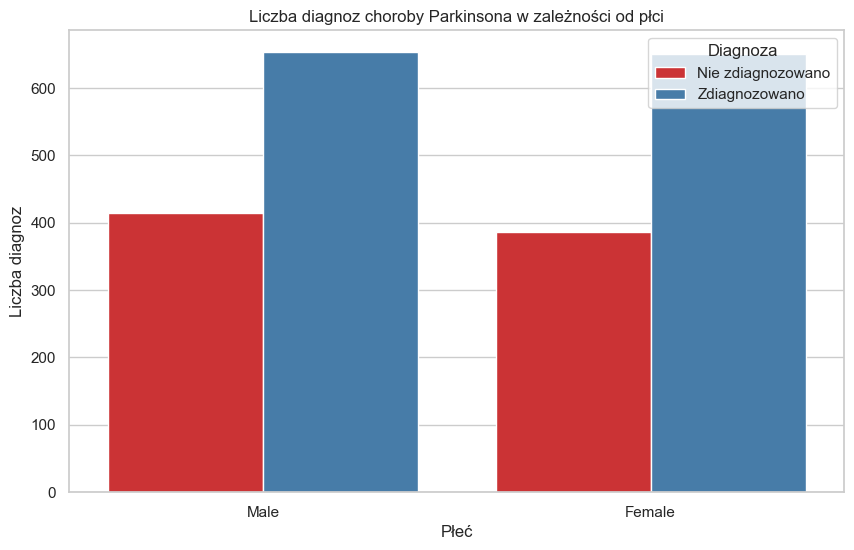

In [33]:
print('Ilość Mężczyzn: ', (data['Gender'] == 0).sum())
print('Ilość Kobiet: ', (data['Gender'] == 1).sum())

gender_correlation = data['Gender'].corr(data['Diagnosis'], method='pearson')
print("Korelacja między płcią a diagnozą choroby Parkinsona:", gender_correlation)

gender_data = data.copy()

gender_data['Gender'] = data['Gender'].map({0: 'Male', 1: 'Female'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Diagnosis', data=gender_data, palette='Set1')
plt.title('Liczba diagnoz choroby Parkinsona w zależności od płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba diagnoz')
plt.legend(title='Diagnoza', labels=['Nie zdiagnozowano', 'Zdiagnozowano'])
plt.show()

##### Wiek

Korelacja między wiekiem a diagnozą choroby Parkinsona: 0.06534391257730043


C:\Users\macie\AppData\Local\Temp\ipykernel_11836\3199567718.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = temp_data.groupby('AgeGroup')['Diagnosis'].value_counts().unstack(fill_value=0)


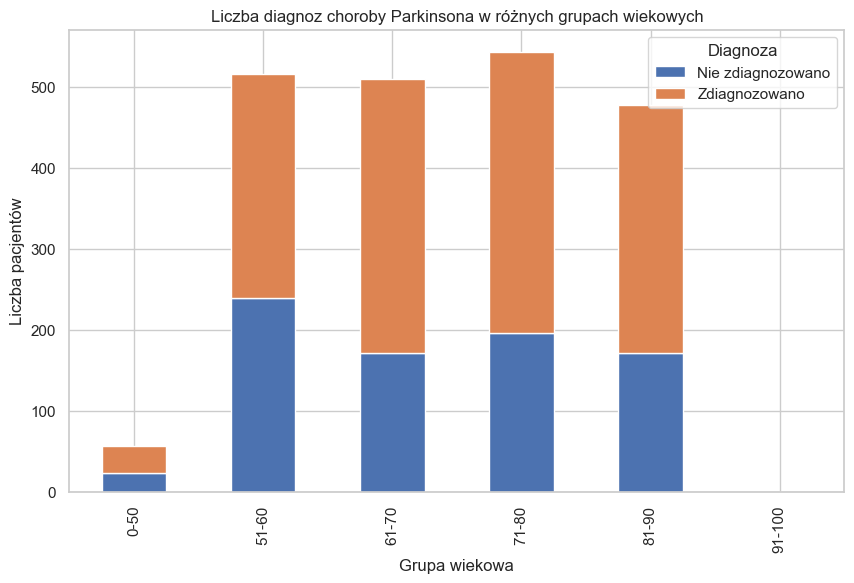

In [34]:
age_correlation = data['Age'].corr(data['Diagnosis'], method='pearson')
print("Korelacja między wiekiem a diagnozą choroby Parkinsona:", age_correlation)

temp_data = data.copy()
temp_data['AgeGroup'] = pd.cut(temp_data['Age'], bins=[0, 50, 60, 70, 80, 90, 100], labels=['0-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

age_group_summary = temp_data.groupby('AgeGroup')['Diagnosis'].value_counts().unstack(fill_value=0)

age_group_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Liczba diagnoz choroby Parkinsona w różnych grupach wiekowych')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Liczba pacjentów')
plt.legend(title='Diagnoza', labels=['Nie zdiagnozowano', 'Zdiagnozowano'])
plt.show()

Korelacja między etnicznością a diagnozą choroby Parkinsona: 0.034926275595749574


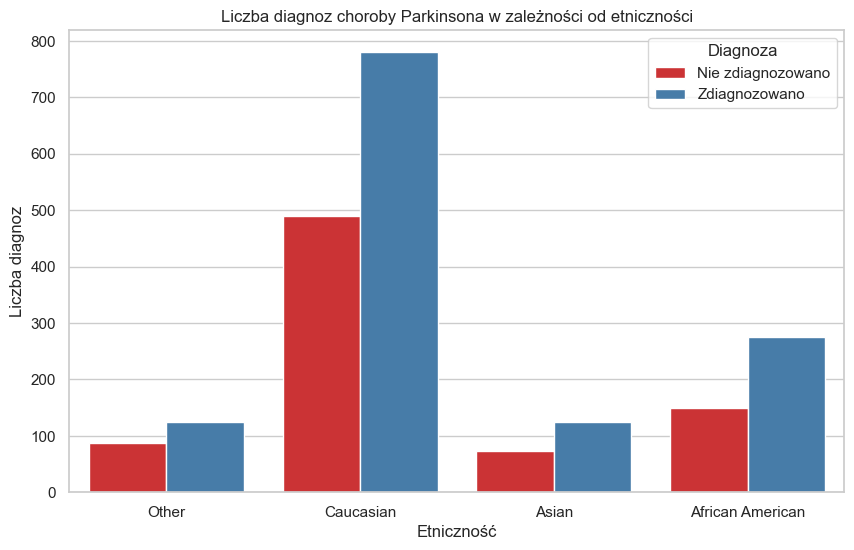

In [35]:
ethnicity_correlation = cramers_v(data['Ethnicity'], data['Diagnosis'])
print("Korelacja między etnicznością a diagnozą choroby Parkinsona:", ethnicity_correlation)

plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='Diagnosis', data=data_vis, palette='Set1')
plt.title('Liczba diagnoz choroby Parkinsona w zależności od etniczności')
plt.xlabel('Etniczność')
plt.ylabel('Liczba diagnoz')
plt.legend(title='Diagnoza', labels=['Nie zdiagnozowano', 'Zdiagnozowano'])
plt.show()

##### Tryb życia

Korelacja Craméra dla palenia i diagnozy Parkinsona: 0.004169539393301095


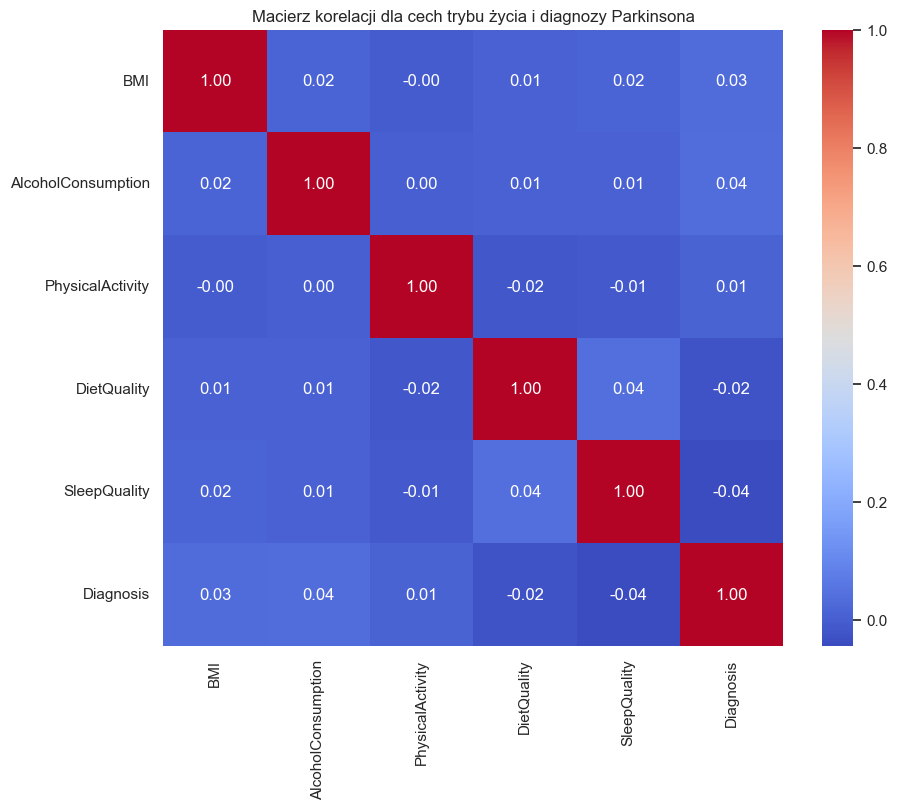

In [36]:
cramer_corr = cramers_v(data['Smoking'], data['Diagnosis'])
print("Korelacja Craméra dla palenia i diagnozy Parkinsona:", cramer_corr)

continuous_vars = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
correlation_matrix = data[continuous_vars + ['Diagnosis']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji dla cech trybu życia i diagnozy Parkinsona')
plt.show()

##### Historia medyczna

C:\Users\macie\AppData\Local\Temp\ipykernel_11836\3460821059.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cramer\'s V', y='Health Factor', data=cramer_df, palette='viridis')


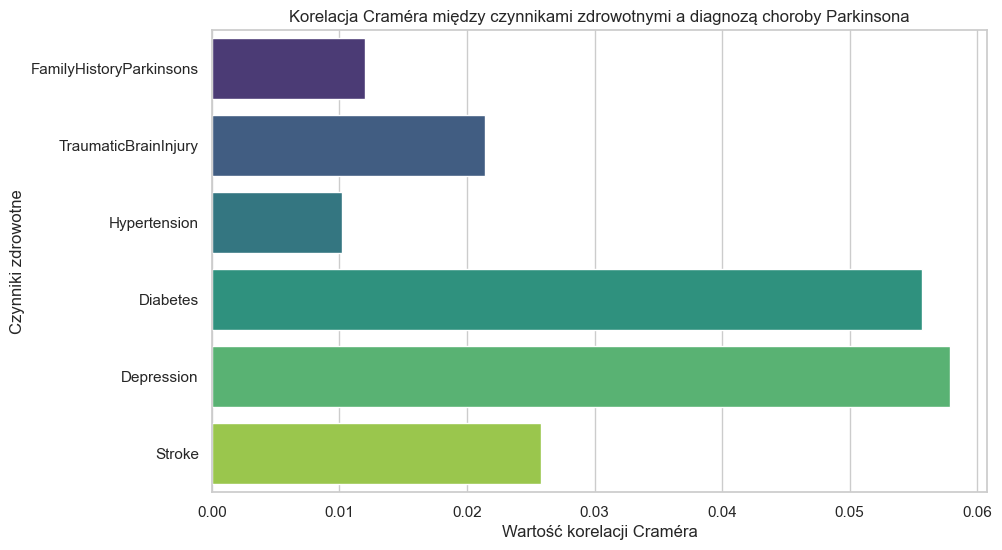

In [37]:
health_factors = ['FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke']

cramer_results = []
for factor in health_factors:
    cramer_corr = cramers_v(data[factor], data['Diagnosis'])
    cramer_results.append((factor, cramer_corr))

cramer_df = pd.DataFrame(cramer_results, columns=['Health Factor', 'Cramer\'s V'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Cramer\'s V', y='Health Factor', data=cramer_df, palette='viridis')
plt.title('Korelacja Craméra między czynnikami zdrowotnymi a diagnozą choroby Parkinsona')
plt.xlabel('Wartość korelacji Craméra')
plt.ylabel('Czynniki zdrowotne')
plt.show()

##### Symptomy

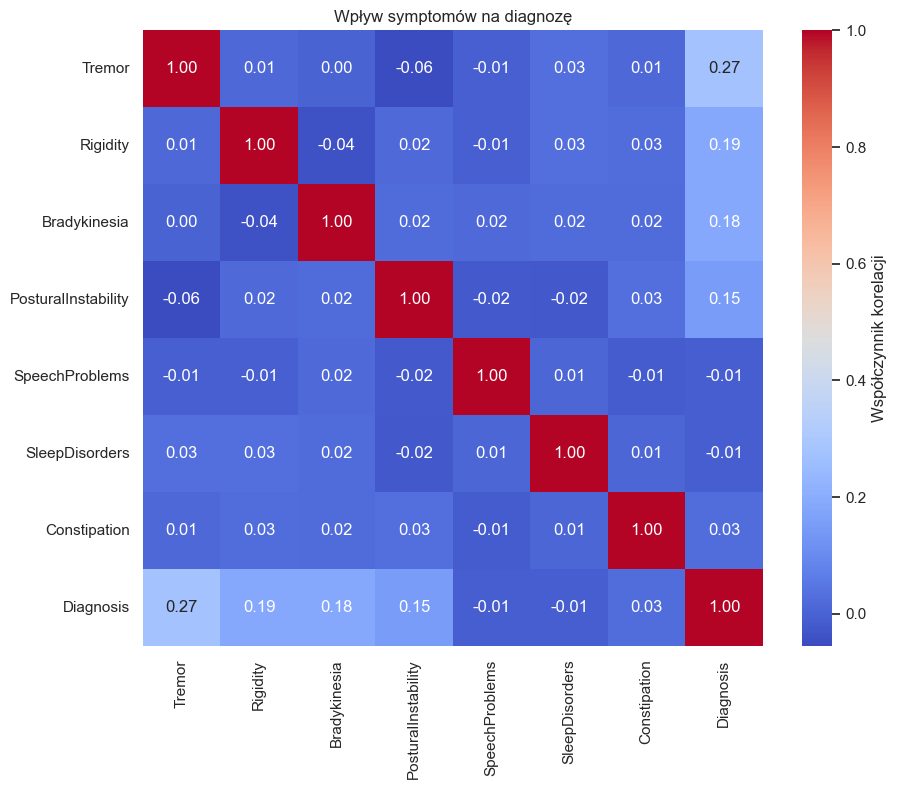

In [38]:
symptoms = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']
symptom_correlation_matrix = data[symptoms + ['Diagnosis']].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(symptom_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Współczynnik korelacji'})
plt.title('Wpływ symptomów na diagnozę')
plt.show()

#### Model ML - Dokładny

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

class DetailedModel:
    def __init__(self, data, random_state=42):
        self.data = data.copy()
        self.random_state = random_state
        self.model = None

    def load_data(self):
        self.features = self.data.drop(columns=['Diagnosis'])
        self.targets = self.data['Diagnosis']

    def split_data(self, test_size=0.3):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.features, self.targets, test_size=test_size, random_state=self.random_state
        )

    def train_model(self, n_estimators=100):
        self.model = RandomForestClassifier(n_estimators=n_estimators, random_state=self.random_state)
        self.model.fit(self.X_train, self.y_train)

    def predict(self):
        self.predictions = self.model.predict(self.X_test)
        return self.predictions

    def evaluate_model(self):
        self.accuracy = accuracy_score(self.y_test, self.predictions)
        return self.accuracy

    def feature_importance(self):
        self.importances = pd.Series(self.model.feature_importances_, index=self.features.columns)
        return self.importances.sort_values(ascending=False)

    def run_all(self):
        self.load_data()
        self.split_data()
        self.train_model()
        self.predict()
        self.evaluate_model()
        return {
            "Accuracy": self.accuracy,
            "Feature Importances": self.feature_importance()
        }

detailed_model = DetailedModel(data)
detailed_results = detailed_model.run_all()
print("Dokładność modelu:", detailed_results['Accuracy'])
print("Znaczenie czynników:\n", detailed_results['Feature Importances'])


Dokładność modelu: 0.7658227848101266
Znaczenie czynników:
 FunctionalAssessment        0.107989
MoCA                        0.090289
Tremor                      0.071514
DietQuality                 0.050201
CholesterolLDL              0.048833
CholesterolTotal            0.047592
AlcoholConsumption          0.046996
CholesterolTriglycerides    0.046229
BMI                         0.045888
SleepQuality                0.044136
PhysicalActivity            0.043773
CholesterolHDL              0.042033
DiastolicBP                 0.041665
Age                         0.041330
SystolicBP                  0.040972
Rigidity                    0.040029
Bradykinesia                0.033033
PosturalInstability         0.019683
EducationLevel              0.016073
Ethnicity                   0.013746
Depression                  0.008845
Gender                      0.008140
Constipation                0.007677
SpeechProblems              0.006990
Smoking                     0.006954
SleepDisorders 

#### Uproszczony model

In [40]:
features = data[['Age', 'Gender', 'Ethnicity','BMI', 'AlcoholConsumption', 'Tremor', 'Diabetes', 'Depression']]
targets = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.5, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Dokładność modelu:", accuracy_score(y_test, model.predict(X_test)))

def predict_parkinson_probability(age, gender, ethnicity, bmi, alc_consumption, tremor, diabetes, depression):
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Ethnicity': [ethnicity],
        'BMI': [bmi],
        'AlcoholConsumption': [alc_consumption],
        'Tremor': [tremor],
        'Diabetes': [diabetes],
        'Depression': [depression]
    })
    
    probabilities = model.predict_proba(input_data)
    
    return probabilities[0][1]

probability = predict_parkinson_probability(21, 0, 0, 39.0, 0, 0, 0, 0)
print(f"Prawdopodobieństwo diagnozy choroby Parkinsona: {probability:.2%}")

Dokładność modelu: 0.6296296296296297
Prawdopodobieństwo diagnozy choroby Parkinsona: 27.00%
